# Insight data challenge practice 1
- Breast Cancer
- 1 hr

# 1. Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['id', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', \
         'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=names)

In [4]:
data = data.set_index('id')

In [5]:
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


## Note: replace outcome into (0/1)
- 0 benign (2)
- 1 malignant (4)

In [6]:
data['Malignant'] = data['Class'].replace([2, 4], [0,1])

In [7]:
data

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,Malignant
id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2,0
1002945,5,4,4,5,7,10,3,2,1,2,0
1015425,3,1,1,1,2,2,3,1,1,2,0
1016277,6,8,8,1,3,4,3,7,1,2,0
1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2,0
841769,2,1,1,1,2,1,1,1,1,2,0
888820,5,10,10,3,7,3,8,10,2,4,1


# 2. Exploratory data analysis

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

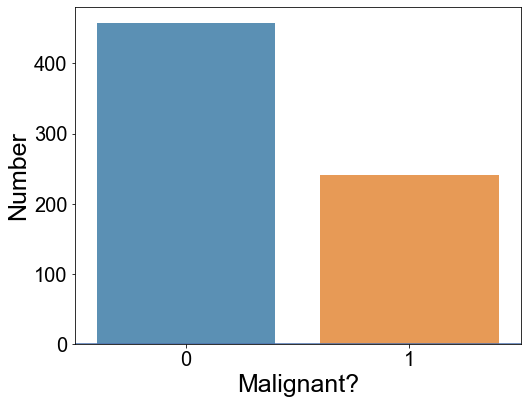

In [9]:
plt.subplots(figsize = (8,6.2))
sns.countplot(x='Malignant', data=data, alpha=0.8)
sns.set()

plt.ylabel('Number',fontsize = 25)
plt.xlabel('Malignant?',fontsize = 25)
plt.xticks(fontsize =20)
plt.yticks(fontsize =20)

plt.axhline()
#plt.savefig('conversion1.png', dpi=300, bbox_inches="tight")
plt.show()

In [10]:
print('missing data:', data.isnull().sum().sum())

missing data: 0


In [11]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
data.apply(minMax)

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,Malignant
min,1,1,1,1,1,1,1,1,1,2,0
max,10,10,10,10,10,?,10,10,10,4,1


In [12]:
pd.unique(data.Bare_Nuclei.values)

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

## Note: "?" can be assigned as '0'

In [13]:
data['Bare_Nuclei'] = data['Bare_Nuclei'].replace(['?'], ['0'])

In [14]:
pd.unique(data.Bare_Nuclei.values)

array(['1', '10', '2', '4', '3', '9', '7', '0', '5', '8', '6'],
      dtype=object)

# 3. Prep training and testing datasets
## Note: 
1. no large variation for each class, therefore no need to rescale
2. data is not too imbalance

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(['Class', 'Malignant'], axis=1)
y = data.Malignant.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify = y)  #stratify: keep the ratio

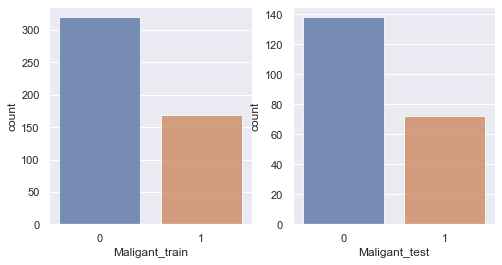

In [17]:
y1 = pd.DataFrame(y_train, columns=['Maligant_train'])
y2 = pd.DataFrame(y_test, columns=['Maligant_test'])
fig, ax = plt.subplots(1, 2, figsize = (8,4))
sns.countplot(x='Maligant_train', data=y1, alpha=0.8, ax = ax[0])
sns.countplot(x='Maligant_test', data=y2, alpha=0.8, ax = ax[1])

#plt.savefig('conversion1.png', dpi=300, bbox_inches="tight")
plt.show()

# 3. Screen Methods

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut, StratifiedKFold, cross_val_score, cross_val_predict

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [20]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Logistic Regression", "Ridge"]

classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RidgeClassifier()]

In [21]:
cv = StratifiedKFold(n_splits=5)
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    accuracy_c = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')
    precision_c = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring='precision')
    recall_c = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring='recall')
    f1_c = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring='f1')
    print('  Metrics      Test - CV (std)')
    print(name)
    print('   Accuracy:   %.3f %.3f (%.3f)' % (accuracy, np.mean(accuracy_c), np.std(accuracy_c)))
    print('  Precision:   %.3f %.3f (%.3f)' % (precision, np.mean(precision_c), np.std(precision_c)))
    print('     Recall:   %.3f %.3f (%.3f)' % (recall, np.mean(recall_c), np.std(recall_c)))
    print('         F1:   %.3f %.3f (%.3f)' % (f1, np.mean(f1_c), np.std(f1_c)))
    print('')

  Metrics      Test - CV (std)
Nearest Neighbors
   Accuracy:   0.976 0.971 (0.015)
  Precision:   0.935 0.959 (0.030)
     Recall:   1.000 0.958 (0.015)
         F1:   0.966 0.959 (0.022)

  Metrics      Test - CV (std)
Linear SVM
   Accuracy:   0.962 0.973 (0.015)
  Precision:   0.932 0.959 (0.030)
     Recall:   0.958 0.964 (0.022)
         F1:   0.945 0.962 (0.022)

  Metrics      Test - CV (std)
RBF SVM
   Accuracy:   0.810 0.859 (0.024)
  Precision:   0.643 0.712 (0.037)
     Recall:   1.000 1.000 (0.000)
         F1:   0.783 0.831 (0.025)

  Metrics      Test - CV (std)
Gaussian Process
   Accuracy:   0.957 0.967 (0.014)
  Precision:   0.920 0.953 (0.029)
     Recall:   0.958 0.953 (0.015)
         F1:   0.939 0.953 (0.019)

  Metrics      Test - CV (std)
Decision Tree
   Accuracy:   0.914 0.949 (0.018)
  Precision:   0.875 0.917 (0.034)
     Recall:   0.875 0.917 (0.034)
         F1:   0.875 0.923 (0.040)

  Metrics      Test - CV (std)
Random Forest
   Accuracy:   0.962 0.977 

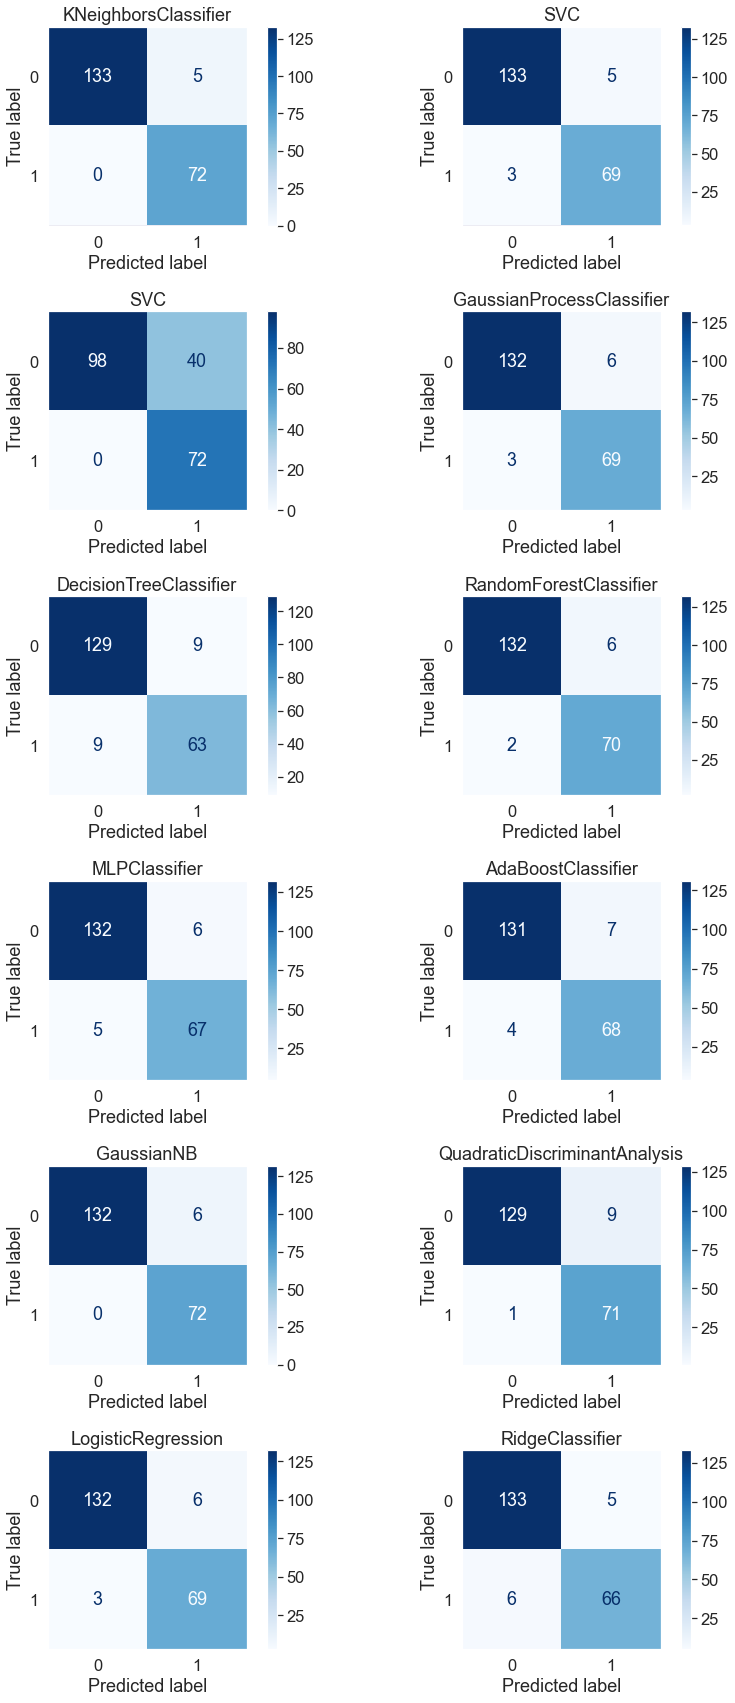

In [22]:
sns.set(font_scale=1.5, style='dark')
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,24))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

## Note: Initial screen shows that
- All models produced comparable results
- The KNN, SVC, and GNB predict zero false negative

# 4 Important features
- Permutation Importance
- Random Forest Feature Importance 

In [23]:
from sklearn.inspection import permutation_importance

In [24]:
rf = RandomForestClassifier(random_state=13)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

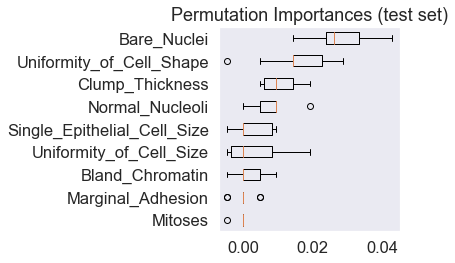

In [25]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

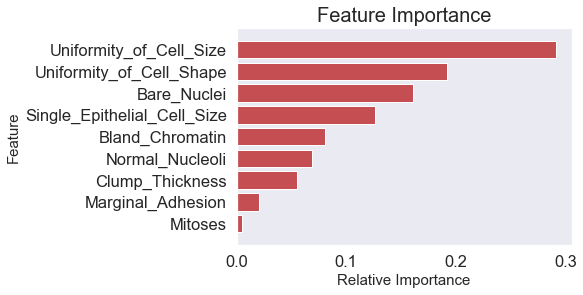

In [26]:
features = X_train.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure()
plt.title("Feature Importance", fontsize=20)
plt.barh(range(len(indices)), importances[indices], color="r", align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [27]:
np.linspace(0,0.2,20)

array([0.        , 0.01052632, 0.02105263, 0.03157895, 0.04210526,
       0.05263158, 0.06315789, 0.07368421, 0.08421053, 0.09473684,
       0.10526316, 0.11578947, 0.12631579, 0.13684211, 0.14736842,
       0.15789474, 0.16842105, 0.17894737, 0.18947368, 0.2       ])

In [28]:
# auto (1 of 2)
# model performance based on selected features by importance  
xs = []
yp = []
yr = []
yf = []
feature = []
for var in np.linspace(0.2,0,20):
# summarize feature importance
    for i,v in enumerate(importances):
        if v >= var:
            feature.append(i)
    X_train1 = X_train.iloc[:,feature]
    X_test1 = X_test.iloc[:,feature]
    rf.fit(X_train1, y_train)
    model_pred1 = rf.predict(X_test1)
    p = precision_score(y_test,model_pred1)
    r = recall_score(y_test,model_pred1)
    f = f1_score(y_test,model_pred1)
    xs.append(var)
    yp.append(p)
    yr.append(r)
    yf.append(f)


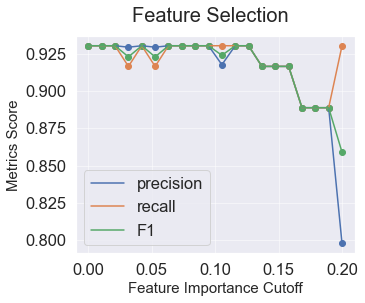

In [29]:
# auto  (2 of 2)
# plotting feature importance by cutoff var
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xs, yp, label='precision')
ax.plot(xs, yr, label='recall')
ax.plot(xs, yf, label='F1')
ax.scatter(xs, yp)
ax.scatter(xs, yr)
ax.scatter(xs, yf)
ax.grid(alpha=0.5, which='major', linestyle='-' )
ax.set_ylabel('Metrics Score', fontsize=15)
ax.set_xlabel('Feature Importance Cutoff', fontsize=15)
fig.suptitle('Feature Selection', fontsize=20)
ax.legend()
plt.show()

In [30]:
feature = []
var = 0.15

# summarize feature importance
for i,v in enumerate(importances):
    if v >= var:
        print('Feature: %0d, Score: %.5f' % (i,v))
        feature.append(i)
for col in X_train.iloc[:,feature].columns:
    print(col)

Feature: 1, Score: 0.29108
Feature: 2, Score: 0.19220
Feature: 5, Score: 0.16109
Uniformity_of_Cell_Size
Uniformity_of_Cell_Shape
Bare_Nuclei


# Most economical tests
- Uniformity_of_Cell_Size
- Uniformity_of_Cell_Shape
- Bare_Nuclei